In [14]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
import matplotlib as mpl

In [15]:
time = np.array([30,20,15,10,5,2.5,1,0.667,0.5,0.33,0.167,0.083,0.01]) #13 timepoints

In [16]:
data_table = np.genfromtxt('PpiB_4C_data.txt').T
data_table.shape

(14, 160)

In [17]:
data_total = [np.stack([data_table[0], data_table[(i)]]) for i in np.arange(13) + 1]
data_out = []
for d in data_total:
    x, y = d
    
    data_out.append([x, y])

f_data = np.array(data_out)[::-1]
f_data.shape


(13, 2, 160)

In [18]:
X=f_data[:,0,:].flatten()
X.shape

(2080,)

In [19]:
Z=f_data[:,1,:].flatten()
Z.shape

(2080,)

In [20]:
Y=np.repeat(time,160)
Y.shape

(2080,)

In [21]:
xi = np.arange(2, 163).astype(float)
yi = np.linspace(0, 30, 2000)
xi

array([  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,  23.,
        24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 15

In [22]:
triang = tri.Triangulation(X, Y)
interpolator = tri.LinearTriInterpolator(triang, Z)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

In [24]:
# cmap desription
positions = [0.,0.25,0.5,0.75,1.]
colors = ['#FFFFFF', '#00FFFF', '#008080','#0075EA','#000080']
norm = mpl.colors.Normalize(vmin=positions[0], vmax=positions[-1])

normed_positions = norm(positions)

cmap = mpl.colors.LinearSegmentedColormap.from_list("Driesscolormap", list(zip(normed_positions, colors)))
cmap.set_bad('#3A3A3A')


C:\Users\Gebruiker\Miniconda3\envs\py36_Global\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  
C:\Users\Gebruiker\Miniconda3\envs\py36_Global\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  


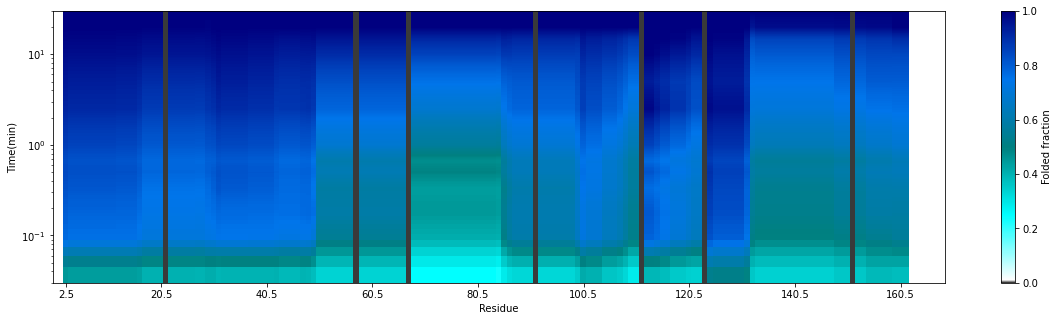

In [25]:
values = zi.copy()
values[values == 0.] = np.nan

fig,ax=plt.subplots(figsize=(20, 5))
image=ax.pcolormesh(xi, yi, values, cmap=cmap, norm=norm, vmin=0 ,vmax =1)
ax.set_yscale('log')
fig.colorbar(image, label='Folded fraction')
plt.ylim(0.03,30)
plt.xlim(0,169)
ax.set_ylabel('Time(min)')
ax.set_xlabel('Residue')
plt.xticks((2.5,20.5,40.5,60.5,80.5,100.5,120.5,140.5,160.5))

plt.savefig('PpiB_scores_4C.png')